# SVM Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import LinearSVC as SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Prepare Dataset

In [2]:
datasetPath = "../Dataset/balanced-74Attributes-top17_ProtocolName.csv"
df = pd.read_csv(datasetPath)
#df = pd.read_csv(datasetPath, nrows=1000000)
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,3232238138,55681,180881158,3128,6,19002242,3,17,6,30.0,...,7352281.0,0.000000,7352281.0,7352281.0,11649832.0,0.000000e+00,11649832.0,11649832.0,131,HTTP_PROXY
1,180881160,3128,3232246304,53107,6,119684671,1006,898,1398550,5388.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,131,HTTP_PROXY
2,3232243804,59584,180881158,3128,6,118953292,24,66,1325,5077.0,...,336393.6,238675.043634,655083.0,172.0,23388871.8,7.972935e+06,29761260.0,12118217.0,131,HTTP_PROXY
3,182845710,53446,180881157,3128,6,59992665,3,3,18,63.0,...,120.0,91.923882,185.0,55.0,29995813.0,2.121108e+07,44994310.0,14997316.0,131,HTTP_PROXY
4,3232254003,21192,180881159,3128,6,1413924,22,0,4622,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,131,HTTP_PROXY


In [3]:
# Encode label for ProtocolName column

encoder = LabelEncoder().fit(df['ProtocolName'])
df['ProtocolName'] = encoder.fit_transform(df['ProtocolName'])

In [4]:
X = df.drop('ProtocolName',axis=1)
Y = df['ProtocolName']

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)


## Train Model

In [5]:
svm = SVC()
#svm = SVC(kernel="linear", C=0.025)
#svm = SVC(gamma=2, C=1),
#svm = SVC(kernel="linear",random_state =0)  

In [6]:
%load_ext memory_profiler

In [7]:
%%time
%memit svm.fit(x_train, y_train)

peak memory: 913.84 MiB, increment: 257.71 MiB
CPU times: user 19min 33s, sys: 1.98 s, total: 19min 35s
Wall time: 19min 35s


In [8]:
%%time
%memit score = svm.score(x_test[:10000], y_test[:10000])

peak memory: 914.05 MiB, increment: 0.00 MiB
CPU times: user 1min 35s, sys: 20 ms, total: 1min 35s
Wall time: 1min 35s


In [9]:
score

0.7892

In [10]:
%%time
%memit y_pred = svm.predict(x_test[:10000])

peak memory: 914.21 MiB, increment: 0.01 MiB
CPU times: user 1min 29s, sys: 32 ms, total: 1min 29s
Wall time: 1min 29s


## Result

In [11]:
print(classification_report(y_test[:10000], y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       585
           1       0.96      0.98      0.97       599
           2       0.91      0.78      0.84       569
           3       0.85      0.89      0.87       593
           4       0.60      0.62      0.61       648
           5       0.53      0.47      0.50       595
           6       0.99      0.99      0.99       530
           7       0.55      0.84      0.66       621
           8       0.74      0.70      0.72       590
           9       0.98      0.95      0.96       594
          10       0.91      0.70      0.79       579
          11       0.64      0.66      0.65       600
          12       0.99      0.97      0.98       592
          13       0.64      0.61      0.63       590
          14       0.98      0.98      0.98       572
          15       0.73      0.91      0.81       527
          16       0.59      0.44      0.51       616

    accuracy              

In [12]:
accuracy = accuracy_score(y_test[:10000], y_pred)
precision = precision_score(y_test[:10000], y_pred, average="macro")
recall = recall_score(y_test[:10000], y_pred, average="macro")
f1 = f1_score(y_test[:10000], y_pred, average="macro")

print(accuracy, precision, recall, f1)

0.7892 0.7999313814278337 0.7931983935389985 0.7921608381672155


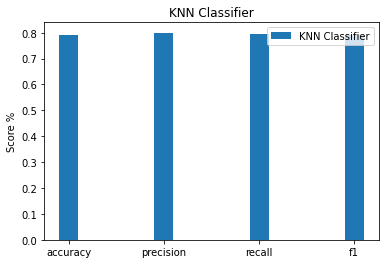

In [13]:
x = ["accuracy", "precision", "recall", "f1"]
scores = [accuracy, precision, recall, f1]

w = 0.2
    
bar1 = np.arange(len(x))
plt.bar(bar1, scores, w, label="KNN Classifier")

plt.gcf().set_size_inches(6, 4)
plt.ylabel("Score %")
plt.title("KNN Classifier")
plt.xticks(bar1, x)
plt.legend()
plt.show()

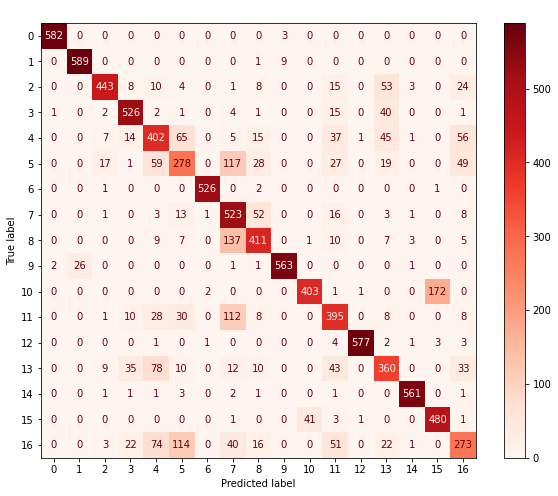

In [14]:
matrix = plot_confusion_matrix(svm, x_test[:10000], y_test[:10000], cmap=plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix", color="white")
plt.gcf().set_size_inches(10, 8)
plt.show()

<AxesSubplot:>

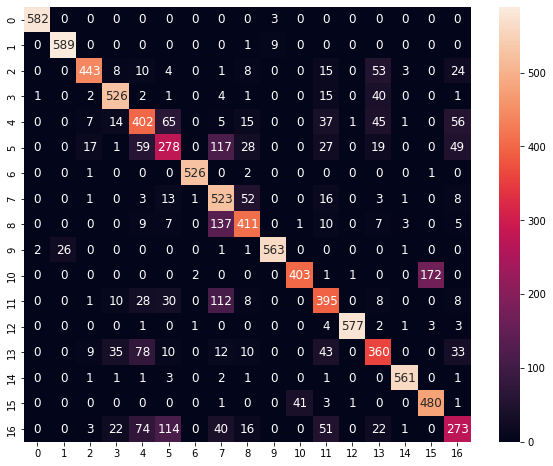

In [15]:
import seaborn as sns

cm = confusion_matrix(y_test[:10000], y_pred)
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(cm, annot=True, ax=ax, fmt='d', annot_kws={"size": 12})